# 💠LGBM & XGBM💠

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

## 💠Exploratory Data Analysis (EDA)

In [2]:
train=pd.read_csv('Titanic_train.csv')
print('Shape of training data ',train.shape)
test=pd.read_csv('Titanic_test.csv')
print('Sahpe of testing data ',test.shape)

Shape of training data  (891, 12)
Sahpe of testing data  (418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

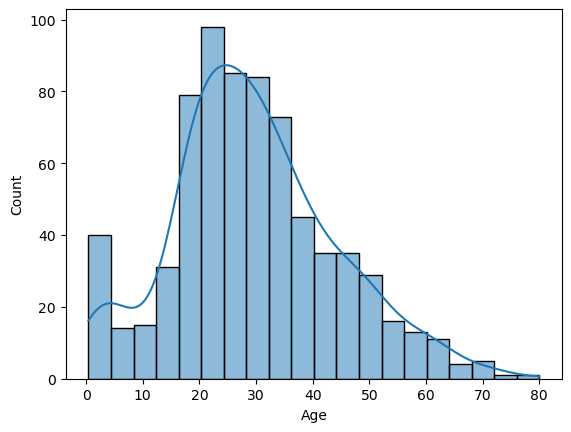

In [5]:
sns.histplot(train['Age'],kde=True)

In [6]:
train['Age']=train['Age'].fillna(train['Age'].mean())
train=train.drop('Cabin',axis=1)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [7]:
print('Duplicates in training data',train.duplicated().sum())

Duplicates in training data 0


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test=test.drop('Cabin',axis=1)
test=test.dropna()
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
print('Duplicates in prediction data',test.duplicated().sum())

Duplicates in prediction data 0


## 💠Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

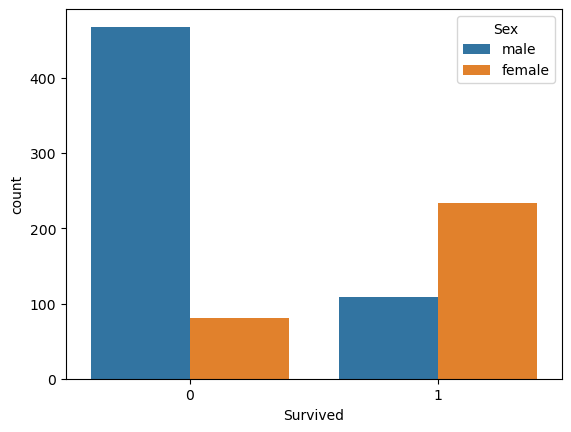

In [12]:
sns.countplot(train,x='Survived',hue='Sex')               # Survival rate of females is greater than males survival rate 

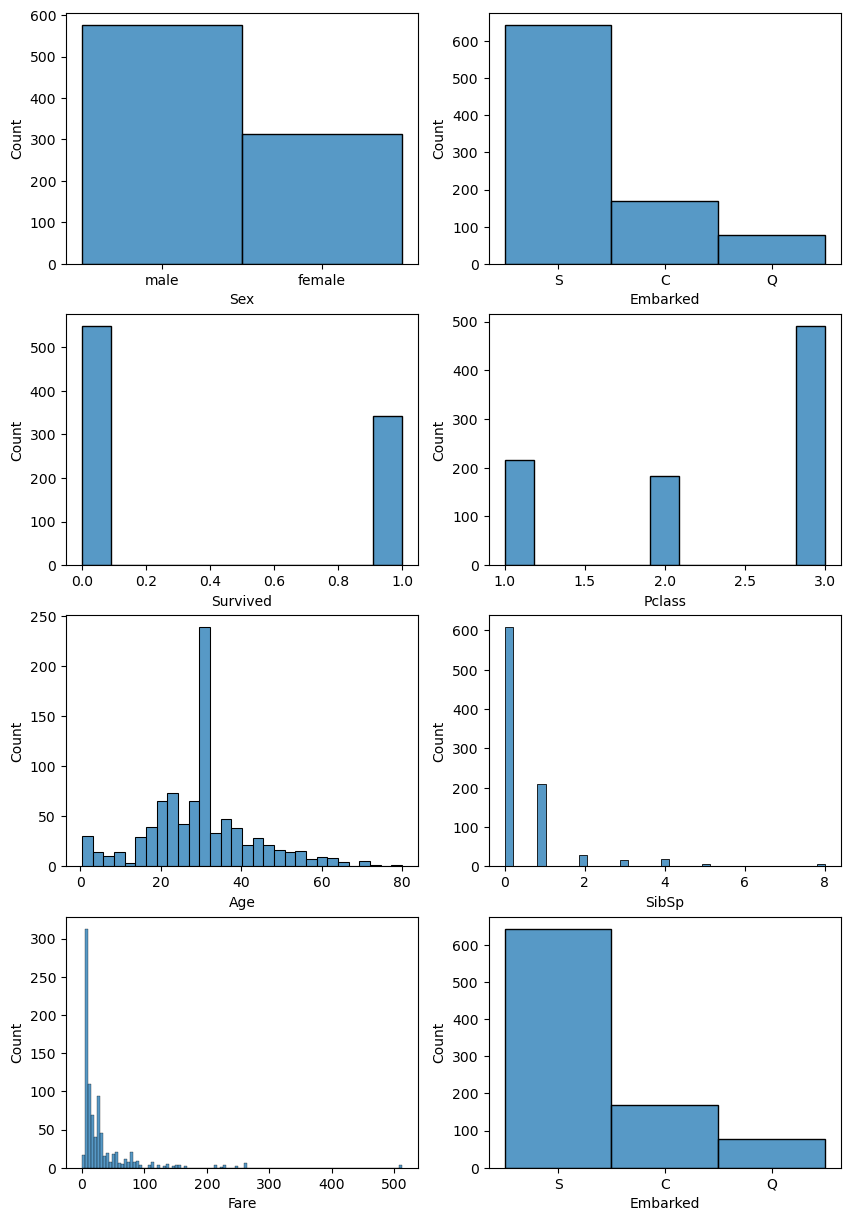

In [20]:
plt.figure(figsize=(10,15))
for i,j in enumerate(['Sex','Embarked','Survived', 'Pclass','Age', 'SibSp','Fare', 'Embarked']):
    plt.subplot(4,2,i+1)
    sns.histplot(train[j])
    plt.plot()

## 💠Data Preprocessing

In [13]:
train['Sex']=train['Sex'].replace(['male','female'],[1,0])
test['Sex']=train['Sex'].replace(['male','female'],[1,0])

In [14]:
X=train[['Sex','Age','SibSp','Parch']]
Y=train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

print('▶Shape of X_train,y_train',(X_train.shape,y_train.shape))
print('▶Shape of X_test,y_test',(X_test.shape,y_test.shape))

▶Shape of X_train,y_train ((712, 4), (712,))
▶Shape of X_test,y_test ((179, 4), (179,))


## 💠XGBoost: XGBClassifier

In [15]:
Model_xgb=XGBClassifier(n_estimators=20,max_depth=4,subsample=0.25,min_child_weight=2)
Model_xgb.fit(X_train,y_train)

y_pred=Model_xgb.predict(X_test)
Y_pred=Model_xgb.predict(X_train)

print('Accuracy on training data ',accuracy_score(y_train,Y_pred))
print('Accuracy on testing data ',accuracy_score(y_test,y_pred))

Accuracy on training data  0.8188202247191011
Accuracy on testing data  0.8212290502793296


<Axes: >

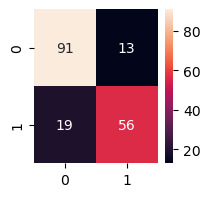

In [16]:
plt.figure(figsize=(2,2))
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM,annot=True)

In [17]:
Predict_test=Model_xgb.predict(test[['Sex','Age','SibSp','Parch']])
test['XGboost_pred']=Predict_test

## 💠LightGBM: LGBMClassifier

In [18]:
from lightgbm import LGBMClassifier
Model_LGBM=LGBMClassifier(n_estimators=30,max_depth=5)
Model_LGBM.fit(X_train,y_train)

y_pred=Model_LGBM.predict(X_test)
Y_pred=Model_LGBM.predict(X_train)

print('Accuracy on training data ',accuracy_score(y_train,Y_pred))
print('Accuracy on testing data ',accuracy_score(y_test,y_pred))

[LightGBM] [Info] Number of positive: 267, number of negative: 445
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375000 -> initscore=-0.510826
[LightGBM] [Info] Start training from score -0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

<Axes: >

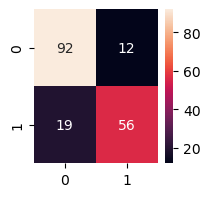

In [19]:
plt.figure(figsize=(2,2))
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM,annot=True)

In [20]:
Predict_test=Model_LGBM.predict(test[['Sex','Age','SibSp','Parch']])
test['LGBM_pred']=Predict_test


## 💠Comparative Analysis
### ▣ By observing accuracy score and confusion matrix of both the algorithm it can be seen that the accuracies are almost similar i.e. XGBClassifier (0.8212)  & LGBMClassifier(0.8268) for the given dataset.
### ▣ Where as on testing data only 3 data points have different results out of 418 data points.

In [21]:
test[test['XGboost_pred']!=test['LGBM_pred']]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,XGboost_pred,LGBM_pred
241,1133,2,"Christy, Mrs. (Alice Frances)",0,45.0,0,2,237789,30.000,S,1,0
306,1198,1,"Allison, Mr. Hudson Joshua Creighton",0,30.0,1,2,113781,151.550,S,1,0
389,1281,3,"Palsson, Master. Paul Folke",0,6.0,3,1,349909,21.075,S,0,1
